#### Task :

Data normalization

* Look at features of Linnerud dataset, explore them and tell what is the problem with these
          `from sklearn.datasets import load_linnerud`

* Normalize these features using a correct method. Plot original vs normalized probability density and comment your results

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
from sklearn.datasets import load_linnerud
import numpy as np
import matplotlib_inline

In [21]:
lr = load_linnerud()
# Exercise observations
features = pd.DataFrame(lr.data, columns=lr.feature_names)
features.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [22]:
# Physiological observations
physiological = pd.DataFrame(lr.target, columns=lr.target_names)
physiological.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [23]:
features.shape

(20, 3)

array([[<Axes: title={'center': 'Chins'}>,
        <Axes: title={'center': 'Situps'}>],
       [<Axes: title={'center': 'Jumps'}>, <Axes: >]], dtype=object)

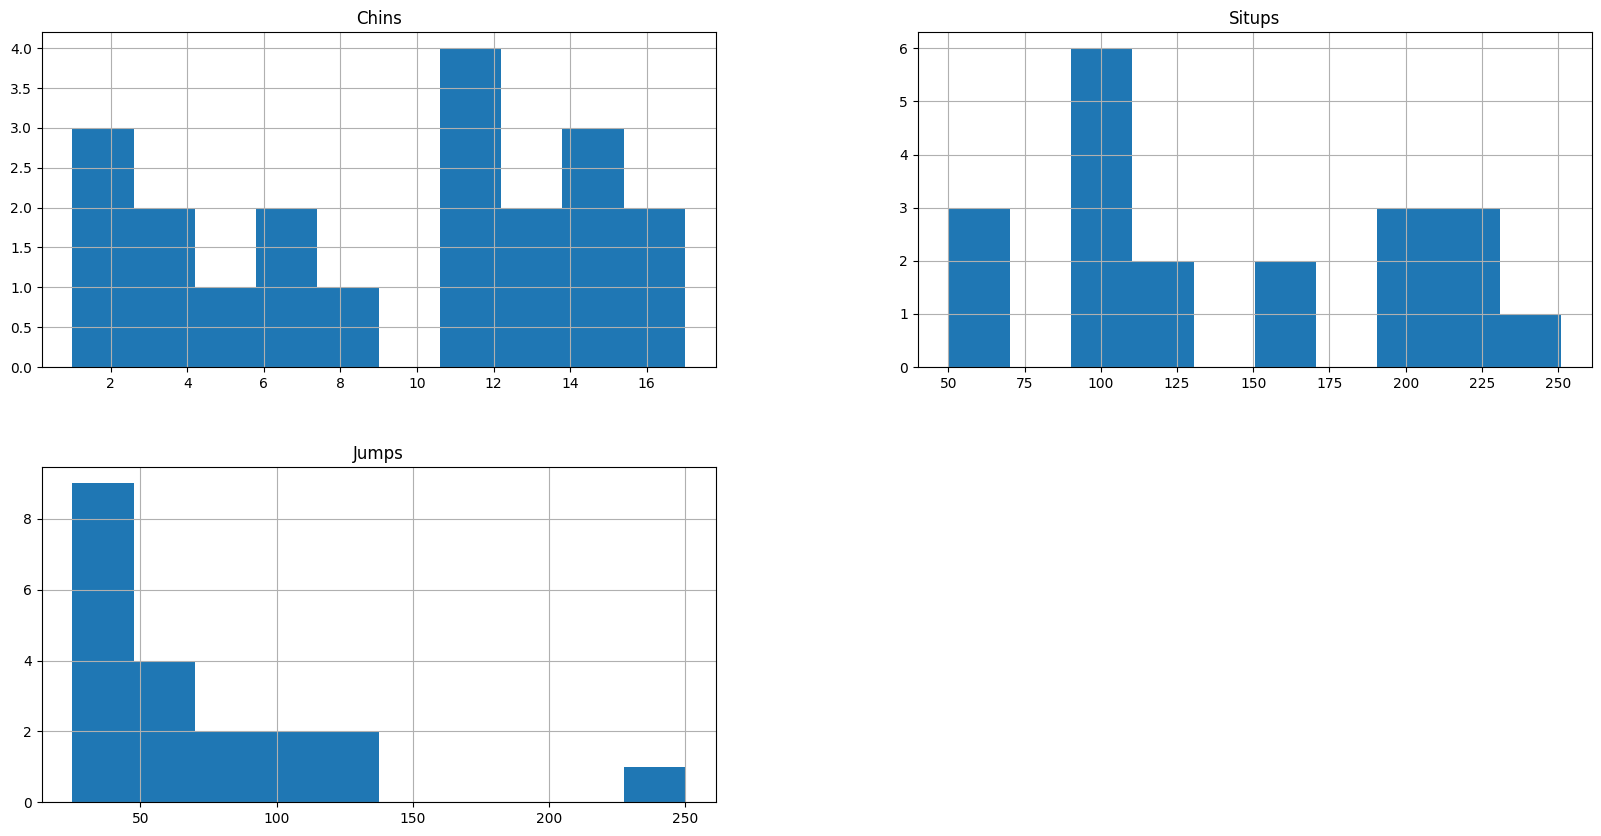

In [24]:
features.hist(figsize=(20,10))

In [25]:
#Column Jumps values look to be skewed towards left

In [26]:
features.describe()

,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


In [27]:
#Checking for summ of all Null Values in each column
features.isnull().sum()

Chins     0
Situps    0
Jumps     0
dtype: int64

In [28]:
high_jumps=features[features['Jumps']>100]
high_jumps

,Chins,Situps,Jumps
2,12.0,101.0,101.0
9,17.0,251.0,250.0
11,13.0,210.0,115.0
12,14.0,215.0,105.0
15,12.0,210.0,120.0


<Axes: xlabel='Situps', ylabel='Jumps'>

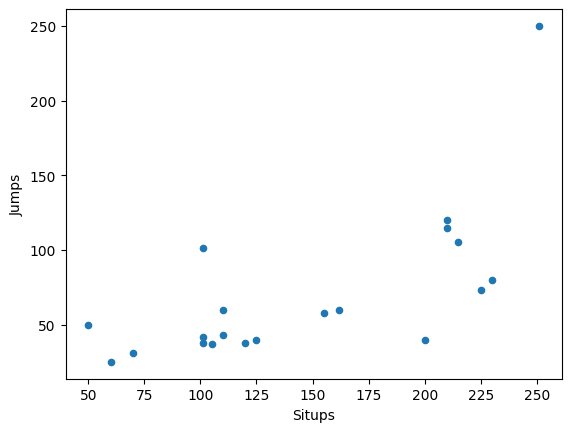

In [29]:
# outliers check
features.plot(kind='scatter', x='Situps', y='Jumps')

<Axes: xlabel='Situps', ylabel='Jumps'>

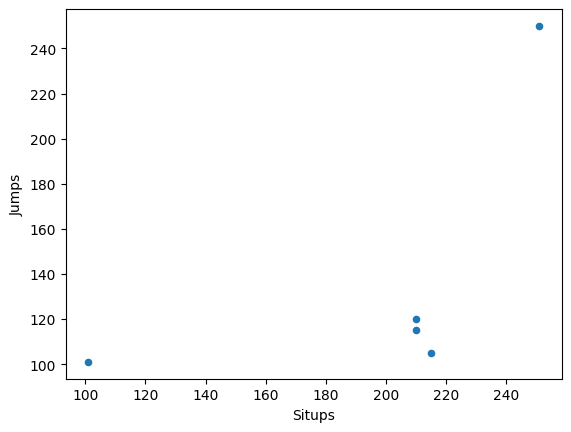

In [30]:
high_jumps.plot(kind='scatter', x='Situps', y='Jumps')

#### Index location 9 for Jumps with value is an outlier with value 250. It needs to be checked.

In [31]:
features.corr()

,Chins,Situps,Jumps
Chins,1.000000,0.695727,0.495760
Situps,0.695727,1.000000,0.669206
Jumps,0.495760,0.669206,1.000000


<Axes: >

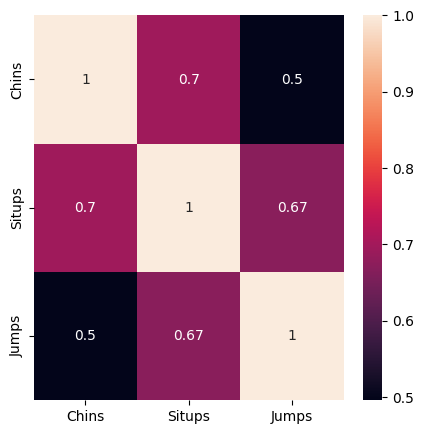

In [32]:
import seaborn as sns
corr= features.corr()
fig, ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True)

#### None of the feature can be ignored beacuse there is a correlation good among all three features

<Axes: >

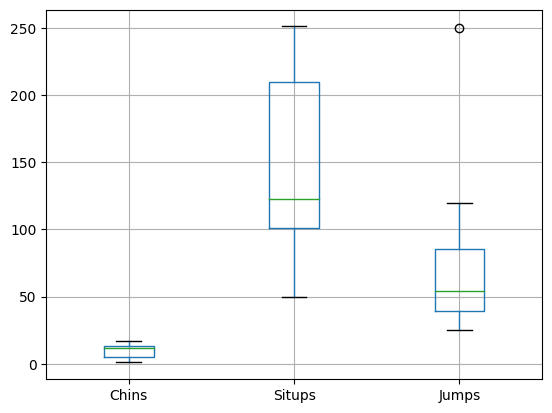

In [33]:
#Doing box plot to confirm the outlierin th feture set and check scaling
features.boxplot(features.columns.tolist() )

### problem with the feature set is :
##### 1. There is outlier value in Jumps which is 250 and above the upper bound of the box plot
##### 2. Also on the above box plot we see the different in the scales of the features such as situps and chins in this dataset

In [34]:
# Normalizing features
from sklearn import preprocessing
d = preprocessing.normalize(features, axis=0)
names = features.columns
scaled_features = pd.DataFrame(d, columns=names)
scaled_features.head()

,Chins,Situps,Jumps
0,0.103874,0.229545,0.155543
1,0.041550,0.155864,0.155543
2,0.249298,0.143112,0.261830
3,0.249298,0.148779,0.095918
4,0.270072,0.219627,0.150358


Text(0.5, 1.0, 'Scaled data')

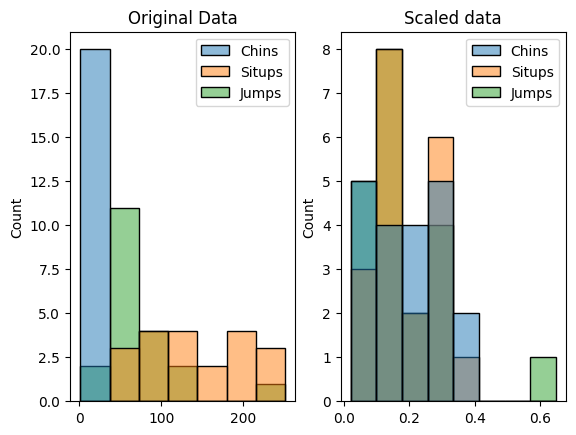

In [38]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(features, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_features, ax=ax[1])
ax[1].set_title("Scaled data")

<ipython-input-39-5216c43db16a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features, ax=ax[0])
<ipython-input-39-5216c43db16a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_features, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

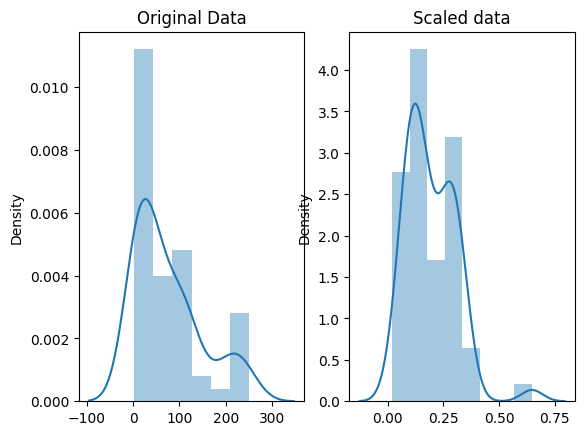

In [39]:
fig, ax=plt.subplots(1,2)
sns.distplot(features, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_features, ax=ax[1])
ax[1].set_title("Scaled data")

We can see a significant difference in normalized and original datasets in above plots.